## MNIST Data

Binary classification based on MNIST data - classifying whether a given image contains the digit '5' or not.
A smaller ('lightweight') version of MNIST is used - containing 8x8 images that are included in the scikit-learn library.

In the following, we use the following notation (see also the notations sheet):

m: Number of samples <br>
n: Number of features

### Data Preparation

#### Load Data 

Image Data Shape (1797, 64)
Label Data Shape (1797,)
[[ 0.  0.  1.  8. 15. 10.  0.  0.]
 [ 0.  3. 13. 15. 14. 14.  0.  0.]
 [ 0.  5. 10.  0. 10. 12.  0.  0.]
 [ 0.  0.  3.  5. 15. 10.  2.  0.]
 [ 0.  0. 16. 16. 16. 16. 12.  0.]
 [ 0.  1.  8. 12. 14.  8.  3.  0.]
 [ 0.  0.  0. 10. 13.  0.  0.  0.]
 [ 0.  0.  0. 11.  9.  0.  0.  0.]]
7


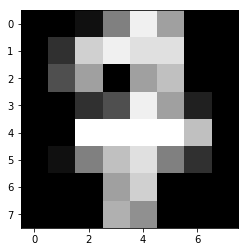

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target
print("Image Data Shape" , x.shape)
print("Label Data Shape", y.shape)

image = x[17,:]
plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
print(np.reshape(image, (8,8)))
print(y[17])

#### Split Data and bring it in the correct shape

Split the data into training set and test set.
We use the scikit-learn function 'train_test_split' and use a (80%/20%) splitting.

Furthermore, we bring the input data (x) into the shape (n,m) where n is the number of input features and m the number of samples.  

In [2]:
from sklearn.model_selection import train_test_split

# split
x_train0, x_test0, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# reshape: 
# for x a simple transpose is sufficient 
# (m,n) -> (n,m) where m is the number of samples and n the number of input features (pixels)
# for y reshape the simple array to become a (1,m) array
x_train1 = x_train0.T
x_test1 = x_test0.T
m_train = x_train0.shape[0]
m_test = x_test0.shape[0]
y_train=y_train.reshape(1,m_train)
y_test=y_test.reshape(1,m_test)

print("Shape training set: ", x_train1.shape, y_train.shape)
print("Shape test set:     ", x_test1.shape, y_test.shape)

Shape training set:  (64, 1437) (1, 1437)
Shape test set:      (64, 360) (1, 360)


#### Data Normalisation

Rescale the data - apply min/max rescaling (- we get back to centering later).

Test that the result is expected.

In [3]:
import numpy as np
xmax = np.max(x_train1)
xmin = np.min(x_train1)
print(xmin, xmax)
x_train = x_train1 / xmax
x_test = x_test1 / xmax

0.0 16.0


### Perceptron-Model

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    ### START YOUR CODE ###
    return 1 / (1 + np.exp(-z))
    ### END YOUR CODE ###

In [5]:
def predict(w, b, X, round=False):
    '''
    Compute the prediction for each of the m samples by using the parameters (w, b).
    Return the numeric value if `round=False` - return a rounded value (0 or 1) if `round=True`. 
    
    Arguments:
    w -- weights, a numpy array with shape (1, n)
    b -- bias, a scalar
    X -- data of size (n,m)
    round -- flag to indicate whether to round or not.
    
    Returns:
    predictions -- a numpy array (vector) containing all predictions
    ''' 
    ### START YOUR CODE ###
    yhat = np.dot(w,X)+b
    predictions = sigmoid(yhat)
    if round:
        return np.round(predictions)
    else:
        return predictions
    
    ### END YOUR CODE ###

### Cost Function

* Cross-Entropy Cost Function
* Mean Square Error Function

In [6]:
def reshapey(yhat,y):
    """
    Checks whether the inputs come as a list in which case it reshapes it to (1,m).
    Implementation is sloppy...
    """
    if type(yhat).__module__ == np.__name__:
        m = yhat.size
        yhat = yhat.reshape(1,m)
        y = y.reshape(1,m)
    else:
        m = 1
    return yhat, y, m

In [7]:
def cost_CE(yhat, y):
    """
    Computes the cross entropy cost function for given predicted values and labels.
    
    Parameters:
    yhat -- A scalar or numpy array with shape (1,m).
    y    -- A scalar or numpy array with shape (1,m).
    
    Returns:
    Cross Entropy Cost
    """    
    yhat, y, m = reshapey(yhat, y)
    
    ### START YOUR CODE ###
    ce_cost =  -(1.0/m) * np.sum((y*np.log(yhat) + (1-y)*np.log(1-yhat)))
    return ce_cost
    ### END YOUR CODE ###

In [8]:
def cost_MSE(yhat, y):
    """
    Computes the mean square error cost function for given predicted values and labels.
    
    Parameters:
    yhat -- A scalar or numpy array with shape (1,m).
    y    -- A scalar or numpy array with shape (1,m).
    
    Returns:
    MSE Cost
    """    
    yhat, y, m = reshapey(yhat, y)

    ### START YOUR CODE ###
    mse_cost = 1/(2*m) * np.sum((yhat-y)^2)
    return mse_cost
    ### END YOUR CODE ###

### Update Rules for the Parameters

Different update rules associated with the different cost functions.

In [9]:
def step_CE(w, b, X, Y):
    """
    Computes the update of the weights and bias - by using the cross entropy cost. 
    
    Arguments:
    w -- weights, a numpy array of size (1,n)
    b -- bias, a scalar
    X -- data of size (n, m)
    Y -- label vector (1, m)

    Returns:
    gradJ -- dictionary with the gradient w.r.t. w (key "dw") and w.r.t. b (key "db")
    """
    ### START YOUR CODE ###
    yhat = predict(w, b, X)
    n, m = X.shape
    dw = (1.0/m) * np.dot((yhat-Y),X.T)
    db = (1.0/m) * np.sum(yhat-Y)
    gradJ = {"dw":dw,"db":db}
    return gradJ
    ### END YOUR CODE ###

In [10]:
def step_MSE(w, b, X, Y):
    """
    Computes the update of the weights and bias - by using the mean square error cost. 

    Arguments:
    w -- weights, a numpy array of size (1,n)
    b -- bias, a scalar
    X -- data of size (n, m)(
    Y -- label vector (1, m)

    Returns:
    gradJ -- dictionary with the gradient w.r.t. w (key "dw") and w.r.t. b (key "db")
    """
    ### START YOUR CODE ###
    yhat = predict(w, b, X)
    n, m = X.shape
    dw = (1.0/m) * np.sum(yhat*(1-yhat)*(yhat-Y)*X)
    db = (1.0/m) * np.sum(yhat*(1-yhat)*(yhat-Y))
    gradJ = {"dw":dw,"db":db}
    return gradJ
    ### END YOUR CODE ###

### For the Output Analysis 

In [11]:
def error_rate(w, b, X, Y):
    """
    Compute the error rate defined as the fraction of misclassified samples.
    
    Arguments:
    w -- weights of shape (1,n)
    b -- bias (scalar)
    X -- data of size (n, m)
    Y -- label vector (1, m)

    Returns:
    error_rate 
    """
    return np.sum(Y !=predict(w, b, X, round=True))/Y.size

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

PIXELS = (8,8)
COLS = 5
def plot_digits(X,Y,indices):
    """
    Plots the digits in a mosaic with up to 8 columns

    Arguments:
    X -- data of size (1, 64)
    Y -- label (a scalar)
    indices -- list of indices    
    """
    if len(indices)==0:
        print("No images to show!")
        return
    cols = min(COLS, len(indices))
    rows = len(indices)/COLS+1
    plt.figure(figsize=(20,4*rows))
    for index, (image, label) in enumerate(zip(X.T[indices,:], Y.T[indices,:])):
        plt.subplot(rows, cols, index+1)
        plt.imshow(np.reshape(image, PIXELS), cmap=plt.cm.gray)
        plt.title('Sample %i\n Label %i\n' % (indices[index],label), fontsize = 12)

### Initialize and Optimize (Learn)

#### Initialize Parameters

In [13]:
def initialize_params(n, random=False):
    """
    This function creates initial values:
    * for w a vector of zeros of shape (1,n) [random=False] or a vector of normally distributed random values [random=True] 
    * for b set to 0.
    
    Argument:
    n -- size of the w vector we want (number of features)
    
    Returns:
    w -- initialized vector of shape (1,n)
    b -- initialized scalar (corresponds to the bias)
    """
    if random:
        w = np.random.randn(*(1,n))
    else:
        w = np.zeros((1,n))
    b = 0.0
    
    return w, b

#### Optimisation

In [14]:
def optimize(w, b, x_train, y_train, x_test, y_test, nepochs, alpha, cost_type="E"):
    """
    This function optimizes w and b by running (batch) gradient descent. It starts with the given 
    weights as initial values and then iteratively updates the parameters for nepochs number of times.
    Returns the trained parameters values as dictionary (keys "w" and "b") and various quantities 
    collected during learning also as dictionary: cost on training and test set ("cost_train", "cost_test"), 
    error rate on training and test set ("error_train", "error_test"), learning speed as length of dw 
    multiplied by alpha with key "step_w" and absolute value of db with key "step_b".
    The output is provided in form of dictionaries (basically, to avoid handling too many variable names in 
    functional calls).
    
    Arguments:
    w -- weights, a numpy array of size (1,n)
    b -- bias, a scalar
    x -- data of shape (n,m)
    y -- true "label" vector (containing 0 or 1), of shape (1, m)
    nepochs -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    cost_type -- cost function to use for the opimisation (CE: cross entropy, MSE: mean square error)
    debug -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    learning_curves -- dictionary with various measures computed during the training useful for plotting 
    different learning curves.    
    """     
    # The following lists are used for tracking the learning progress so that learning curves can be plotted.
    # Append an according value in each epoch
    epochs = []  # fill here the epoch id (the iteration index when looping over nepochs)
    train_costs = [] # fill here the cost on the training set  
    test_costs = [] # fill here the cost on the test set 
    train_errors = [] # fill here the error rate on the training set
    test_errors = [] # fill here the error rate on the test set 
    stepsize_w = [] # fill here the lenght of the gradient of the weights vector multiplied with alpha (for the training set)
    stepsize_b = [] # fill here the absolute value of derivative wr.t. the bias multiplied with alpha (for the training set)
        
    if cost_type=="CE":
        step = step_CE
        cost = cost_CE
    elif cost_type=="MSE":
        step = step_MSE
        cost = cost_MSE
    else:
        print("Cost type %s not supported."%cost_type)
        return
        
    ### START YOUR CODE ###
    
    for it in range(0,nepochs):
        epochs.append(it)
        gradJ = step(w,b,x_train,y_train)
        w = w - alpha*gradJ['dw']
        b = b - alpha*gradJ['db']
        stepsize_w.append(np.linalg.norm(alpha*gradJ['dw']))
        stepsize_b.append(np.linalg.norm(alpha*gradJ['db']))
        yhat = predict(w, b, x_train, round=False)
        train_costs.append(cost(yhat, y_train))
        train_errors.append(error_rate(w, b, x_train, y_train))

        yhat = predict(w, b, x_test, round=False)
        test_costs.append(cost(yhat, y_test))    
        test_errors.append(error_rate(w, b, x_test,y_test))


    ### END YOUR CODE ###
    
    params = {"w": w, "b": b}    
    learning_curves = {}
    learning_curves["epochs"] = epochs
    learning_curves["step_w"] = stepsize_w
    learning_curves["step_b"] = stepsize_b
    learning_curves["cost_train"] = train_costs
    learning_curves["cost_test"] = test_costs
    learning_curves["error_train"] = train_errors
    learning_curves["error_test"] = test_errors
        
    print("Training error / cost : %6.4f / %6.4f"%(train_errors[-1], train_costs[-1]))
    print("Test error / cost : %6.4f / %6.4f"%(test_errors[-1], test_costs[-1]))

    return params, learning_curves

### Run the Training for Specific Setting

In [21]:
# target digit
target = 5
learning_rate = 0.5
nepochs = 2000
X_train = x_train
Y_train = y_train==target
X_test = x_test
Y_test = y_test==target
w,b = initialize_params(8*8)
params, learning_curves = optimize(w, b, X_train, Y_train, X_test, Y_test, nepochs=nepochs, alpha=learning_rate, cost_type="CE")

Training error / cost : 0.0063 / 0.0212
Test error / cost : 0.0083 / 0.0330


### Plot Learning Curves

Cost <br>
Error Rate <br>
Learning Speed (Lenght of Parameter Change)<br>

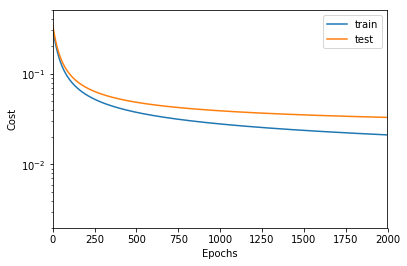

In [16]:
plt.semilogy(learning_curves["epochs"], learning_curves["cost_train"], label="train")
plt.semilogy(learning_curves["epochs"], learning_curves["cost_test"], label="test")
plt.ylabel('Cost')
plt.xlabel('Epochs')
xmax = learning_curves["epochs"][-1]
plt.axis([0,xmax,0.002,0.5])
plt.legend()
plt.show()

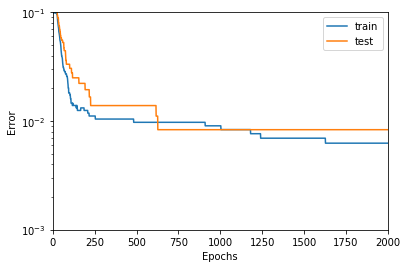

In [17]:
plt.semilogy(learning_curves["epochs"], learning_curves["error_train"], label="train")
plt.semilogy(learning_curves["epochs"], learning_curves["error_test"], label="test")
plt.ylabel('Error')
plt.xlabel('Epochs')
xmax = learning_curves["epochs"][-1]
plt.axis([0,xmax,0.001,0.1])
plt.legend()
plt.show()

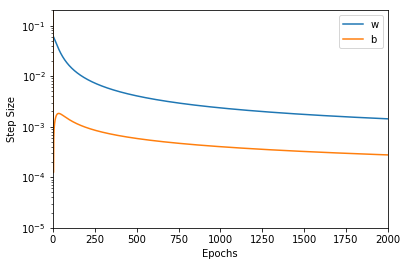

In [18]:
plt.semilogy(learning_curves["epochs"], learning_curves["step_w"], label="w")
plt.semilogy(learning_curves["epochs"], learning_curves["step_b"], label="b")
plt.ylabel('Step Size')
plt.xlabel('Epochs')
xmax = learning_curves["epochs"][-1]
plt.axis([0,xmax,0.00001,0.2])
plt.legend()
plt.show()

3
[ 56  84 181]
[[ True  True  True]]
[[ 0.000  0.000  0.000]]
[[ 0.319  0.475  0.010]]


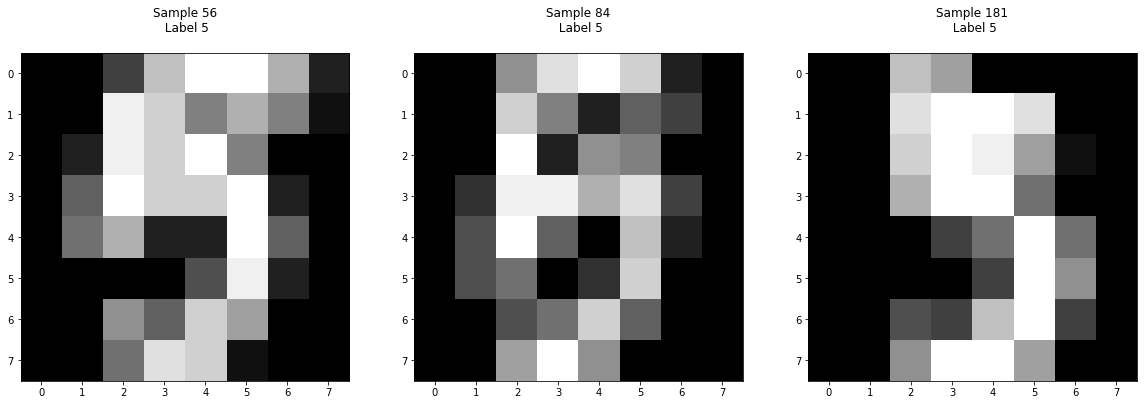

In [203]:
Y_pred = predict(params['w'], params['b'], X_test, round=True)
indices = np.where(Y_test!=Y_pred)[1]
print(len(indices))
print(indices)
print(Y_test[:,indices])
print(Y_pred[:,indices])
print(predict(params['w'], params['b'], X_test[:,indices]))

plot_digits(x_test, y_test, indices)

### Plot the Trained Weights as 8x8 Image 

[[ 0.000  0.254  2.046 -0.732  0.285  2.030  1.302 -0.367]
 [ 0.002  0.222  1.152  0.143  0.099 -1.423 -0.481 -0.227]
 [-0.001  0.403  1.537 -0.040 -2.813 -4.466 -2.252 -0.068]
 [-0.005  0.962  1.781  0.659  0.820 -0.981 -1.796 -0.001]
 [ 0.000 -0.403  0.345 -0.809 -0.814 -0.152 -0.054  0.000]
 [-0.002 -0.913 -2.300 -1.752 -0.984  0.290  0.150 -0.009]
 [-0.001  0.063 -0.781 -0.617 -0.144 -0.501 -0.939 -0.110]
 [-0.000  0.259  1.806  0.477 -1.084 -1.509 -1.000 -0.434]]
-1.2471882773401357


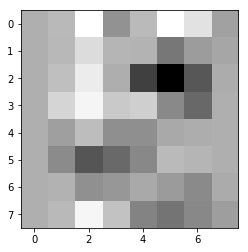

In [204]:
plt.imshow(np.reshape(params['w'], (8,8)), cmap=plt.cm.gray)
np.set_printoptions(precision=3, formatter={'float': '{: 0.3f}'.format})

print(np.reshape(params['w'], (8,8)))
print(params['b'])

### Analysis for all the Digits

Run batch gradient descent independently for all the digits (0-9).<br>
Plot the error rates (train and test) for the trained models against the digit in a single plot. <br>
Which digit can be predicted very well - for which is the prediction rather bad? <br>
Plot the digits and interpret what you see.

Target: 0
[[False False False ... False False False]]
Training error / cost : 0.0007 / 0.0081
Test error / cost : 0.0000 / 0.0082
[]
No images to show!


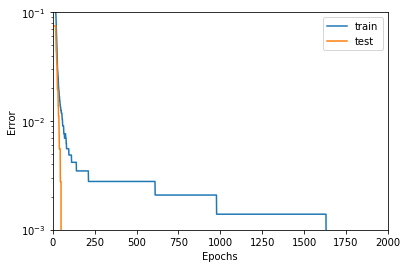

Target: 1
[[False False False ... False False False]]
Training error / cost : 0.0167 / 0.0506
Test error / cost : 0.0194 / 0.0609
[[0.09768395 0.74166167 0.14750914 0.55344183 0.22745538 0.45204153
  0.11091787]]


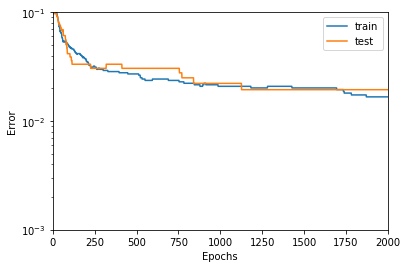

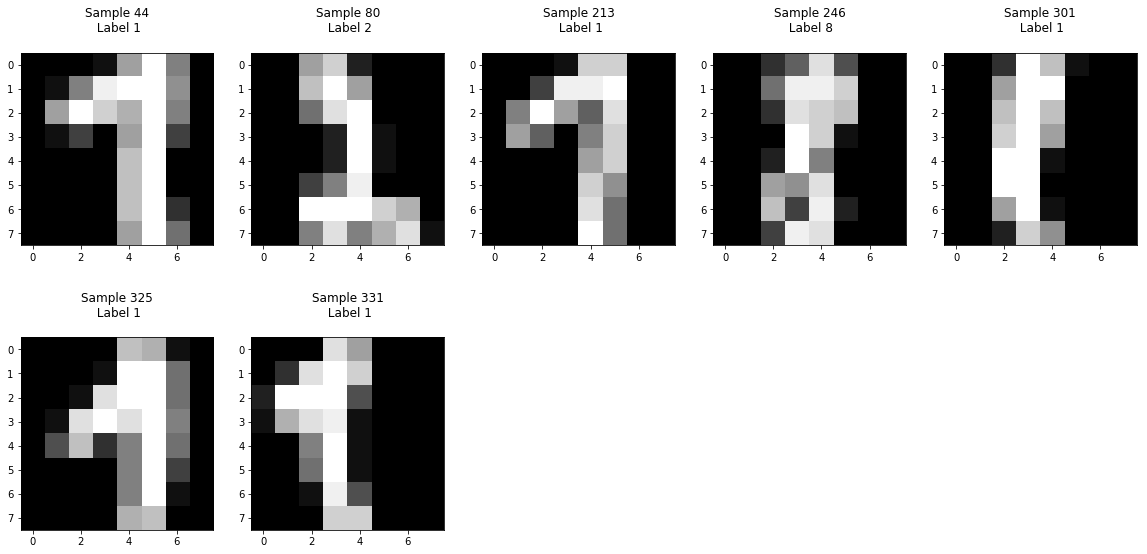

Target: 2
[[False False False ... False False False]]
Training error / cost : 0.0007 / 0.0135
Test error / cost : 0.0111 / 0.0265
[[0.37750152 0.37896645 0.38113661 0.48924829]]


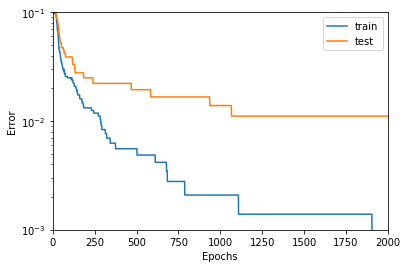

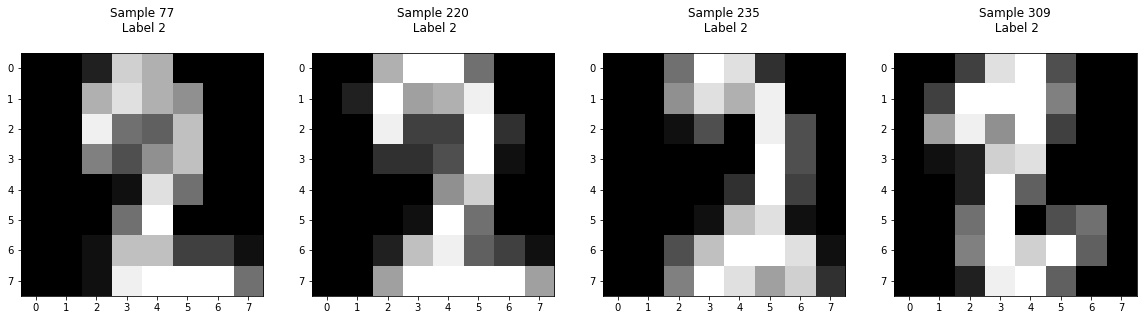

Target: 3
[[False False  True ... False False False]]
Training error / cost : 0.0146 / 0.0411
Test error / cost : 0.0111 / 0.0339
[[0.29234925 0.52631152 0.33856563 0.24579646]]


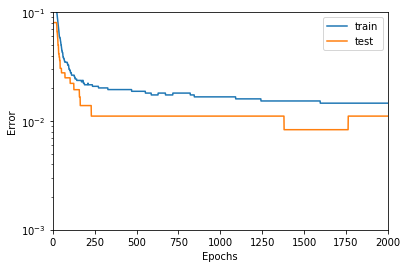

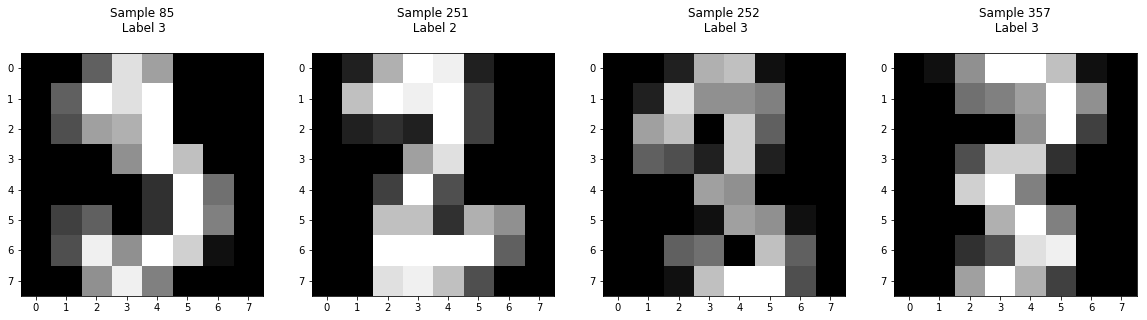

Target: 4
[[False False False ... False False False]]
Training error / cost : 0.0028 / 0.0161
Test error / cost : 0.0056 / 0.0180
[[0.7726908  0.24781252]]


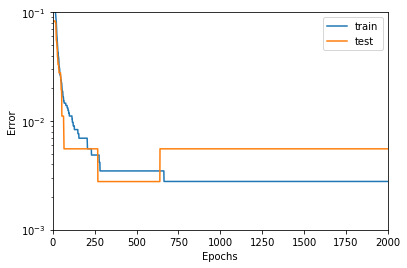

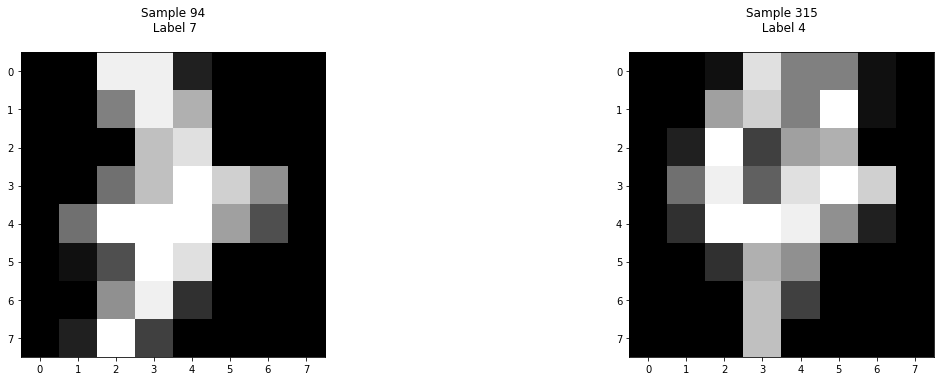

Target: 5
[[False  True False ... False False False]]
Training error / cost : 0.0063 / 0.0212
Test error / cost : 0.0083 / 0.0330
[[0.31938414 0.47466919 0.00961999]]


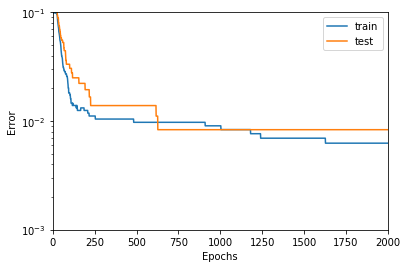

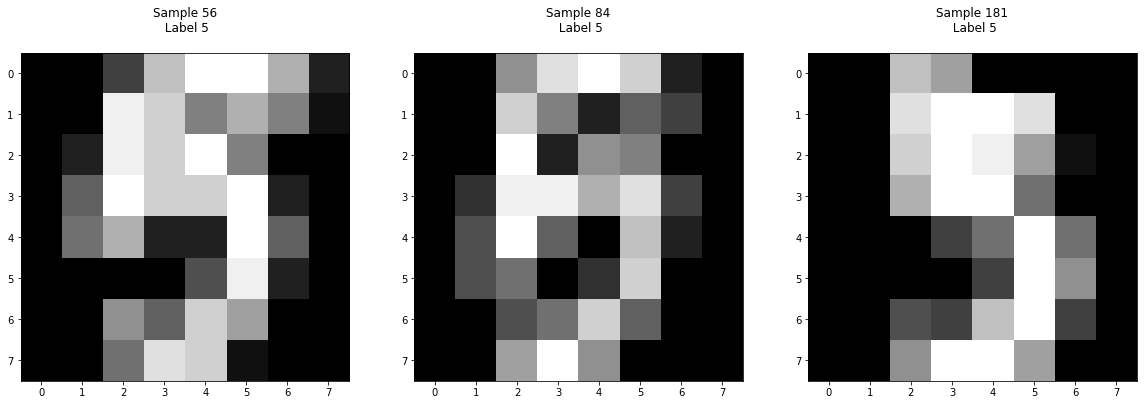

Target: 6
[[ True False False ... False False False]]
Training error / cost : 0.0042 / 0.0166
Test error / cost : 0.0111 / 0.0254
[[0.25090896 0.10611003 0.14530981 0.57947931]]


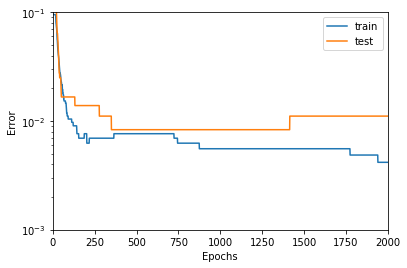

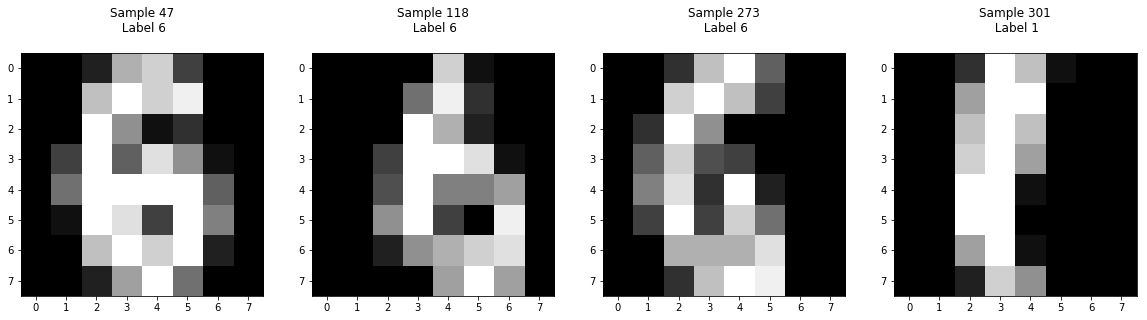

Target: 7
[[False False False ...  True  True False]]
Training error / cost : 0.0028 / 0.0187
Test error / cost : 0.0111 / 0.0294
[[0.64653206 0.10849333 0.46191411 0.72032184]]


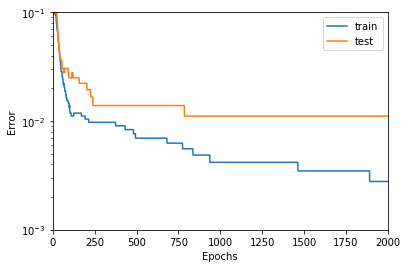

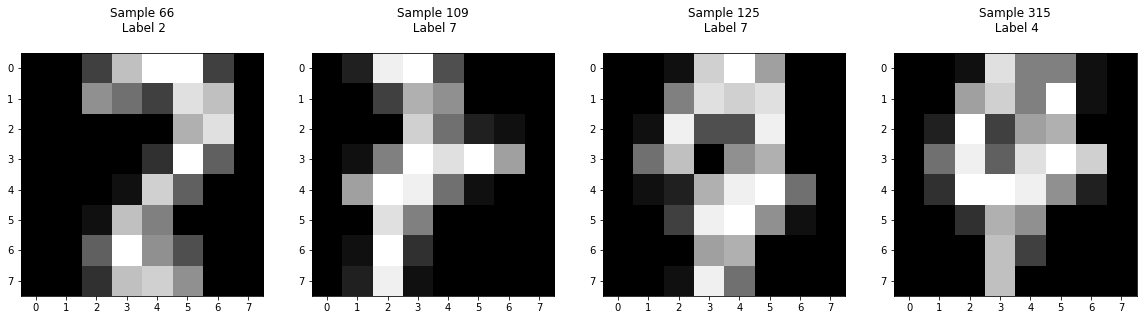

Target: 8
[[False False False ... False False  True]]
Training error / cost : 0.0320 / 0.0898
Test error / cost : 0.0333 / 0.0988
[[0.3043443  0.03457878 0.05841228 0.33448296 0.19665793 0.18732652
  0.47411436 0.41569376 0.3431859  0.5993947  0.0864175  0.21831371]]


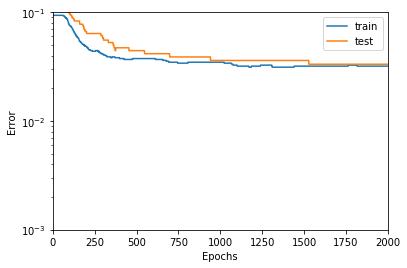

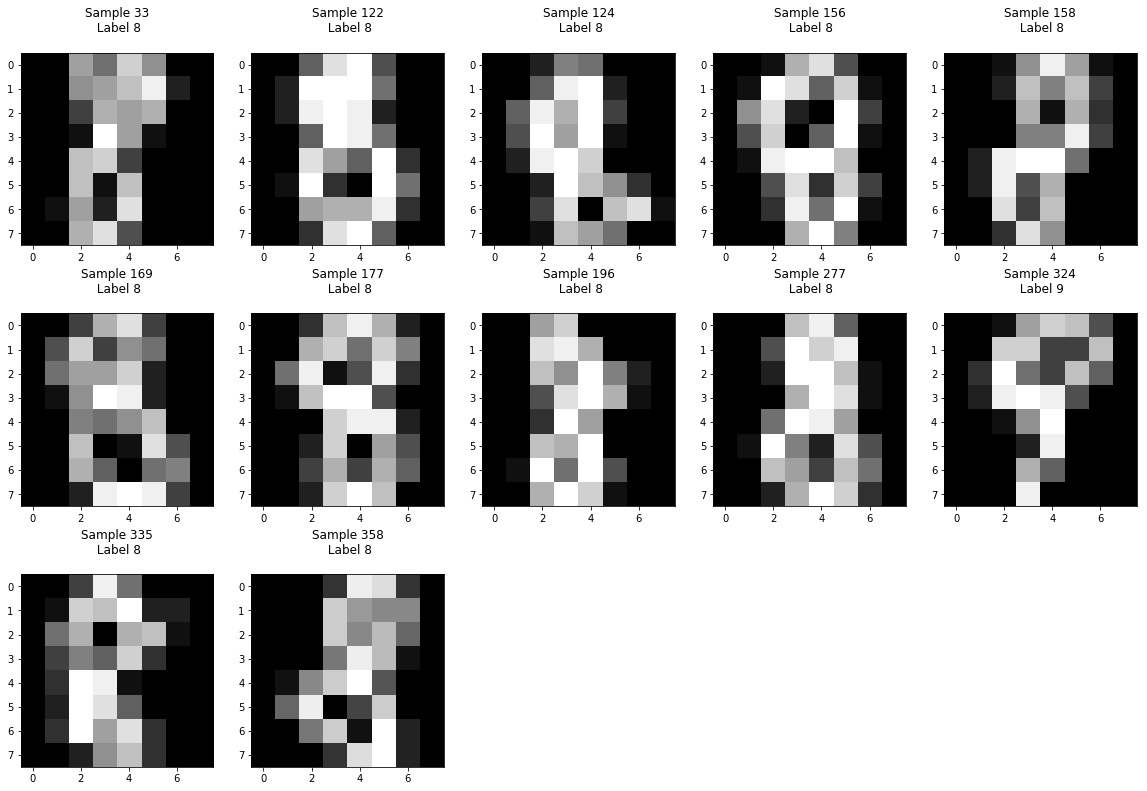

Target: 9
[[False False False ... False False False]]
Training error / cost : 0.0118 / 0.0482
Test error / cost : 0.0222 / 0.0627
[[0.4235292  0.32080708 0.34864419 0.1361182  0.37662837 0.48369946
  0.01938324 0.38160334]]


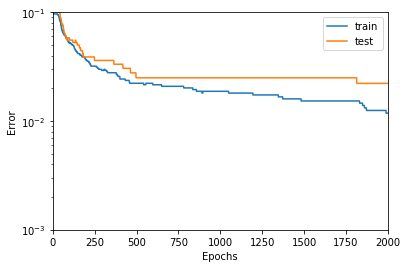

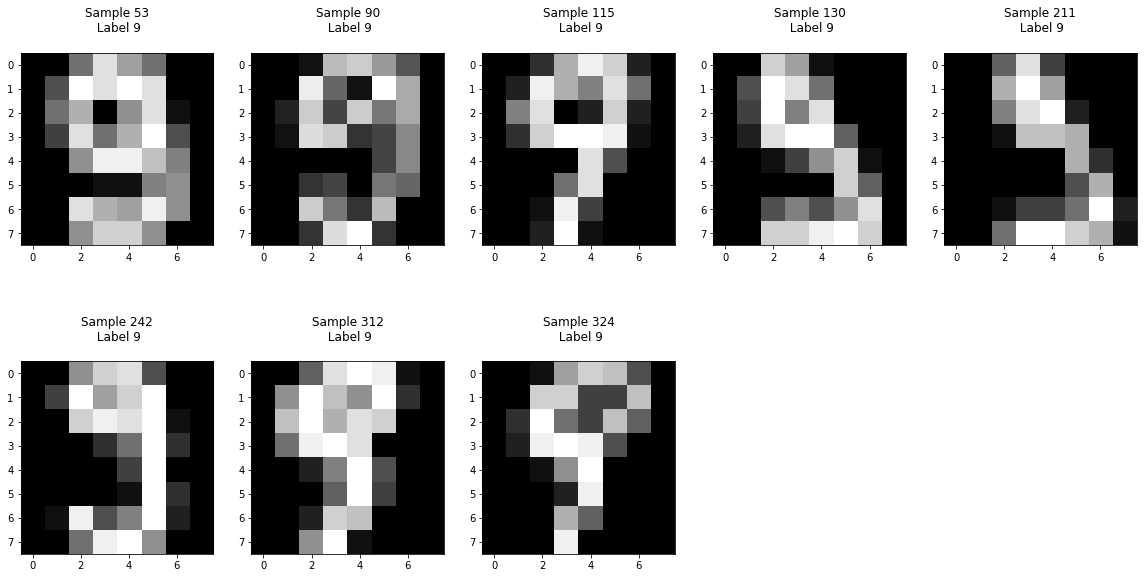

In [65]:
### START YOUR CODE ###

learning_rate = 0.5
nepochs = 2000

for d in range(0,10):

    target = d
    print('Target: {}'.format(d))
    X_train = x_train
    Y_train = y_train==target
    print(Y_train)
    X_test = x_test
    Y_test = y_test==target
    w,b = initialize_params(8*8)
    params, learning_curves = optimize(w, b, X_train, Y_train, X_test, Y_test, nepochs=nepochs, alpha=learning_rate, cost_type="CE")
   
    plt.semilogy(learning_curves["epochs"], learning_curves["error_train"], label="train")
    plt.semilogy(learning_curves["epochs"], learning_curves["error_test"], label="test")
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    xmax = learning_curves["epochs"][-1]
    plt.axis([0,xmax,0.001,0.1])
    plt.legend()
    
    Y_pred = predict(params['w'], params['b'], X_test, round=True)
    indices = np.where(Y_test!=Y_pred)[1]
    #print(len(indices))
    #print(indices)
    #print(Y_test[:,indices])
    #print(Y_pred[:,indices])
    print(predict(params['w'], params['b'], X_test[:,indices]))
    plot_digits(x_test, y_test, indices)
    
    plt.show()

### END YOUR CODE ###

1797
7


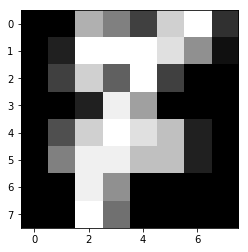

In [68]:
from random import randint

samples, size = x.shape
print(samples)
idx = randint(0,samples)
digits = load_digits()
x = digits.data
image = x[idx,:]
plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
print(y[idx])